<a href="https://colab.research.google.com/github/darthfelipe21/Data_Scientist/blob/main/Electric_bikes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, Normalizer, normalize, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Data and create Dataframe
df= pd.read_csv('/content/electric_bike_ratings_2212.csv')

In [ ]:
# Print firsts rows and shape of the dataframe
print(df.head())
print(df.shape)

   owned     make_model review_month web_browser reviewer_age primary_use  \
0      1   Nielah-Eyden          Oct      Chrome           23   Commuting   
1      0  Nielah-Keetra          Jun         NaN           24   Commuting   
2      0   Lunna-Keetra       23-Oct      Chrome           28   Commuting   
3      1   Hoang-Keetra       07-Nov          IE           41     Leisure   
4      1   Lunna-Keetra       16-Sep      Chrome           33     Leisure   

  value_for_money  overall_rating  
0            5/10           18.62  
1            4/10           15.55  
2            5/10           12.76  
3            5/10           17.07  
4            5/10           12.29  
(1500, 8)


In [ ]:
# Transform columns review_month to date type
df['month_of_review'] = df['review_month'].apply(lambda months: months.split('-')[1] if '-' in months else months)
df= df.drop('review_month', axis=1)
df['month_of_review'] = pd.to_datetime(df['month_of_review'], format='%b', errors='coerce').dt.to_period('M').dt.strftime('%b')
print(df)

      owned     make_model web_browser reviewer_age primary_use  \
0         1   Nielah-Eyden      Chrome           23   Commuting   
1         0  Nielah-Keetra         NaN           24   Commuting   
2         0   Lunna-Keetra      Chrome           28   Commuting   
3         1   Hoang-Keetra          IE           41     Leisure   
4         1   Lunna-Keetra      Chrome           33     Leisure   
...     ...            ...         ...          ...         ...   
1495      1   Nielah-Eyden      Chrome            -     Leisure   
1496      1   Nielah-Eyden         NaN           39   Commuting   
1497      1   Nielah-Eyden      Chrome           21   Commuting   
1498      0   Nielah-Eyden      Safari           45   Commuting   
1499      1    Hoang-Eyden          IE           37     Leisure   

     value_for_money  overall_rating month_of_review  
0               5/10           18.62             Oct  
1               4/10           15.55             Jun  
2               5/10          

In [ ]:
# Print all nulls
df.isnull().sum()

owned                0
make_model           0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
month_of_review      0
dtype: int64

In [ ]:
# Fill null values with "unkown"
df['web_browser'].fillna('unknown', inplace=True)

In [ ]:
df.reviewer_age.sort_values().value_counts()

-     105
19     52
41     51
45     50
44     46
18     46
20     46
17     45
37     45
39     45
30     45
40     45
16     43
23     43
48     42
46     41
21     41
22     40
36     39
33     39
26     39
24     39
27     38
25     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64

In [ ]:
# Change the values no numeric from 'reviewer_age' to mean_age
mean_age= []

df['reviewer_age']= df['reviewer_age'].replace('-', 0).astype(int)

for _, n in df['reviewer_age'].items():
  if  n != 0 :
    mean_age.append(n)

mean_age= np.mean(mean_age).astype(int)

df['reviewer_age']= df['reviewer_age'].replace(0, mean_age).astype(int)

df.reviewer_age.sort_values().value_counts()

32    135
19     52
41     51
45     50
18     46
20     46
44     46
37     45
17     45
39     45
30     45
40     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
26     39
24     39
27     38
25     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64

In [ ]:
# Standarize column 'value_for_money'
df['cost-effectiveness'] = df['value_for_money'].apply(lambda score: score.split('/')[0] if '/' in score else score)
df= df.drop('value_for_money', axis=1)
df['cost-effectiveness'].value_counts()

5     387
6     323
4     315
3     183
7     167
2      53
8      52
1      11
9       8
10      1
Name: cost-effectiveness, dtype: int64

In [ ]:
# Checking that all values ​​are as description
for col in df:
  print('Column name:','\n', col)
  print('Count of values:','\n', df[col].value_counts(),'\n')

Column name: 
 owned
Count of values: 
 1    890
0    610
Name: owned, dtype: int64 

Column name: 
 make_model
Count of values: 
 Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64 

Column name: 
 web_browser
Count of values: 
 Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64 

Column name: 
 reviewer_age
Count of values: 
 32    135
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
24     39
26     39
25     38
27     38
42     37
47     37
43     36
28     36
31     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64 

Column name: 
 primary_use
Count of values: 
 Commuting    1095
Leisure       405
Name: prima

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owned               1500 non-null   int64  
 1   make_model          1500 non-null   object 
 2   web_browser         1500 non-null   object 
 3   reviewer_age        1500 non-null   int64  
 4   primary_use         1500 non-null   object 
 5   overall_rating      1500 non-null   float64
 6   month_of_review     1500 non-null   object 
 7   cost-effectiveness  1500 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB


[Text(0, 0, 'non-owners'), Text(0, 1, 'owners')]

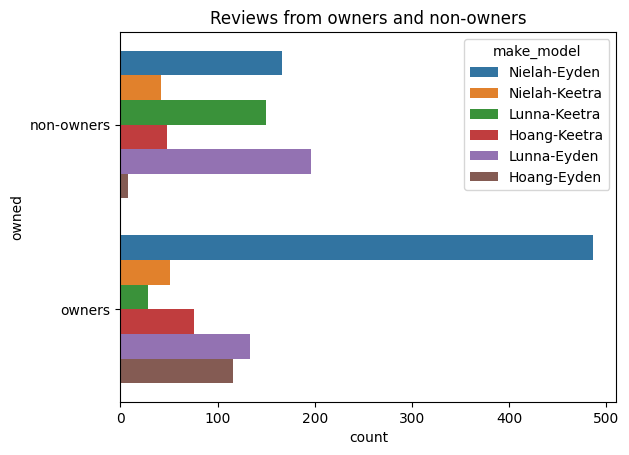

In [ ]:
# Make a count plot to show reviews from owners and not owners
sns.countplot(data= df, y= 'owned', hue= 'make_model').set_title('Reviews from owners and non-owners')

# Get the axes object
ax = plt.gca()

# Changing names from axes y
changing_names = ['non-owners', 'owners']
ax.set_yticklabels(changing_names)

As can be seen in the graph, in at least 4 out of the 6 models, there is a higher number of reviews from owners than from non-owners, especially in the 'Nielah-Eyden' model, where at least two-thirds of the reviews come directly from owners.

We can conclude, for now:

1. The 'Lunna-Keetra' and 'Lunna-Eyden' models have more reviews from non-owners, while the 'Nielah-Eyden', 'Nielah-Keetra', 'Hoang-Keetra', and 'Hoang-Eyden' models have more reviews from owners.
2. The 'Nielah-Eyden' model has the highest overall number of reviews, both from owners and non-owners.
3. Due to the fact that the opinions of the owners are higher in 4 of the 6 models, the distribution tends to be unbalanced, less so for the 'Nielah-Keetra' model.

In [ ]:
# Difference between owners and non-owners
df['owned'].value_counts()

1    890
0    610
Name: owned, dtype: int64

Text(0.5, 0.98, 'Overall Rating Distribution')

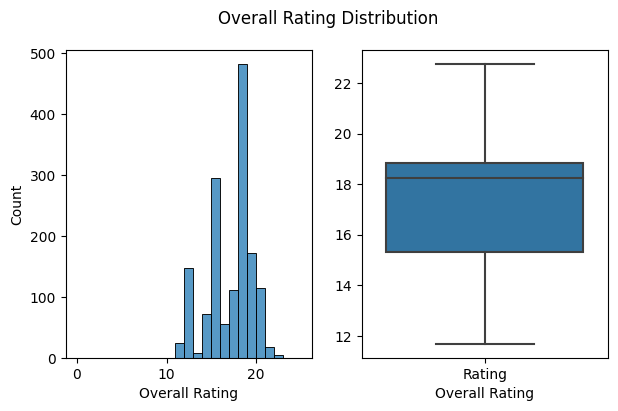

In [ ]:
# Plot Overall Rating Distribution
fig, (ax0, ax1)= plt.subplots(nrows= 1, ncols=2, figsize=(7,4))

# Making a Histogram and a Boxplot
sns.histplot(df['overall_rating'], ax= ax0, bins=range(0,26))
sns.boxplot(df['overall_rating'], ax= ax1)

# Parameter for the axis
ax0.set(xlabel='Overall Rating')
ax1.set(xlabel='Overall Rating')
ax1.set_xticklabels(['Rating'])
plt.suptitle('Overall Rating Distribution')

In [ ]:
# Compute de median and the mean of overall_rating
print('Median of rating: ', np.median(df['overall_rating']))
print('Mean of rating: ', round(np.mean(df['overall_rating']), 2))

Median of rating:  18.24
Mean of rating:  17.14


Based on the graphs, there seems to be a distribution with a left skew, and as we can observe in the calculations of mean and median, the mean tends to be slightly lower than the median.

To certify or corroborate this information, we will evaluate the coefficients of Pearson and Fisher skewness.

In [ ]:
# Calculate the Pearson asymmetry coefficient
coef_pearson = stats.skew(df['overall_rating'])

# Print Results
print("Pearson asymmetry coefficient:", coef_pearson)

Pearson asymmetry coefficient: -0.5901576982135008


With this calculation, we can conclude that since the Pearson skewness coefficient is -0.5901576982135008, there is indeed a negative skew in the distribution of the data. This is consistent with the interpretation of the previous graphs.

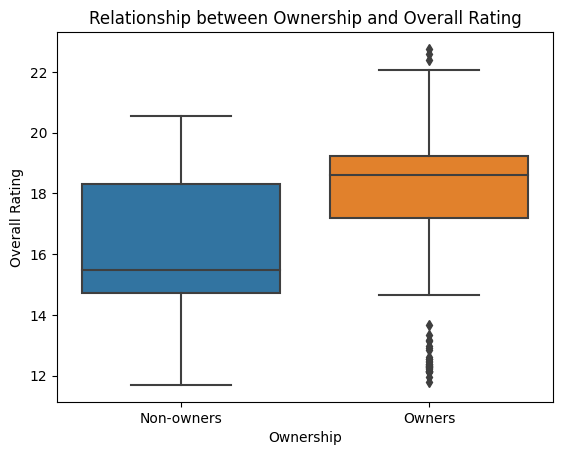

In [ ]:
# Plot relationship between owned and overall_rating
sns.boxplot(x=df['owned'], y=df['overall_rating'])
plt.xlabel('Ownership')
plt.ylabel('Overall Rating')
plt.title('Relationship between Ownership and Overall Rating')
plt.xticks([0, 1], ['Non-owners', 'Owners'])

# Show the plot
plt.show()

Based on the provided information, it can be observed that there is a stronger relationship between higher ratings and ownership. In fact, there are more outliers below the lower whisker for non-owners, and the median is higher than the upper quartile (Q3) for the ratings of non-owners.

Based on the box plot analysis of this data for owners and non-owners, it can be concluded that a larger proportion of positive ratings comes from owners. This conclusion is supported by the presence of more outliers and a higher median for owners, suggesting that non-owners tend to have lower overall ratings compared to owners.

### **Classification**

In this case, the two categories are "owner" and "non-owner," and the task is to classify each review into one of these categories.

In [ ]:

encoded_data = pd.get_dummies(df[['primary_use', 'web_browser', 'make_model']])

# Combinar el dataframe codificado con el dataframe original
data_encoded = pd.concat([df, encoded_data], axis=1)
data_encoded= data_encoded.drop(['primary_use', 'web_browser', 'make_model'], axis=1)
data_encoded['cost-effectiveness']= data_encoded['cost-effectiveness'].astype(int)

In [ ]:
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   owned                     1500 non-null   int64  
 1   reviewer_age              1500 non-null   int64  
 2   overall_rating            1500 non-null   float64
 3   month_of_review           1500 non-null   object 
 4   cost-effectiveness        1500 non-null   int64  
 5   primary_use_Commuting     1500 non-null   uint8  
 6   primary_use_Leisure       1500 non-null   uint8  
 7   web_browser_Android       1500 non-null   uint8  
 8   web_browser_Chrome        1500 non-null   uint8  
 9   web_browser_Firefox       1500 non-null   uint8  
 10  web_browser_IE            1500 non-null   uint8  
 11  web_browser_Opera         1500 non-null   uint8  
 12  web_browser_Safari        1500 non-null   uint8  
 13  web_browser_unknown       1500 non-null   uint8  
 14  make_mod

In [ ]:
# Split the data in features (X) and target (y)
X= data_encoded.drop(['owned', 'month_of_review'], axis= 1).values
y= data_encoded['owned'].values.reshape(-1,1)

In [ ]:
# Applying train test split to the features and target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 10)

In [ ]:
# Instantiating a LogisticRegression Model
logreg= LogisticRegression()

# Fit model
logreg.fit(X_train, y_train)

# Predict test set labels
y_pred_lr= logreg.predict(X_test)
accuracy_lr= accuracy_score(y_test, y_pred_lr)

# Compute the score
print('Accuracy with default params= ', accuracy_lr)

Accuracy with default params=  0.7533333333333333


In [ ]:
# Trying LogisticRegression adjusting some params
params = {'solver': ['liblinear', 'newton-cg'], "penalty": ["l1", "l2"],"tol": [0.001, 0.01, 0.1, 1], "C": np.linspace(0.1, 1.0, 4), "class_weight": ["balanced",{0:0.8, 1:0.2}]}

# Instantiate GridSearchCV
lr_cv= GridSearchCV(logreg, params, cv=10)

# Fit lr_cv
lr_cv.fit(X_train, y_train)

# Predict test set labels
y_pred_lg1= lr_cv.predict(X_test)

# Computing best_params and best_score
print('Best params: ', lr_cv.best_params_)
print('Best score: ', lr_cv.best_score_)

Best params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1}
Best score:  0.7504761904761905


**After conducting two tests with the logistic regression model, one using the default hyperparameters and another with 10 iterations using GridSearchCV, it was decided to keep the default parameters due to their slightly better performance.**

In [ ]:
# Fit a Random Forest Classifier as the comparison model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = model.predict(X_test)
accuracy_rf= accuracy_score(y_test, y_pred_rf)

# Compute the score
print('Accuracy with default params= ', accuracy_rf)

Accuracy with default params=  0.7311111111111112


In [ ]:
# Trying RandomForestClassifier adjusting some params
params_rf={'n_estimators':range(200, 400, 50), 'max_depth': [4], 'max_features':['log2','auto','sqrt'],'min_samples_leaf':range(10, 30, 3), 'min_samples_split':[4]}

# Instantiate GridSearchCV
rf_grid= GridSearchCV(model, params_rf, cv=5)

# Fit rf_grid
rf_grid.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf1= rf_grid.predict(X_test)

# Computing best_params and best_score
print(rf_grid.best_params_)
print(rf_grid.best_score_)


{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 250}
0.7466666666666667



In this case, the RandomForestClassifier achieved a better score or performance by adjusting some of the hyperparameters compared to the default hyperparameters:

-**n_estimators**: We performed 4 iterations, increasing by 50 from 200 to 400, in an attempt to improve performance.

-**max_depth**: A depth of 4 was assigned to capture more complex relationships in the data.

-**max_features**: It determines the maximum number of features to consider when splitting a node. "sqrt" or "auto" was assigned to select the square root of the total number of features, and "log2" was selected to choose the base-2 logarithm of the total number of features.

-**min_samples_leaf**: It defines the minimum number of samples required to be in a leaf node. In this case, we performed 3 iterations, increasing by 10 from 10 to 30.

-**min_samples_split**: It specifies the minimum number of samples required to split an internal node. In this case, it was set to 4.

**LogisticRegression** is a fully used model in binary classification. It relies on the use of a logistic function to model the probability of belonging to a class. This model is particularly suitable when there is a suspicion that the relationships between the predictor variables and the target variable are linear. Additionally, LogisticRegression is a relatively simple and fast model to train, making it more efficient for classifications.

**RandomForestClassifier** is based on decision trees that combines the predictions of multiple trees to obtain a final result. Unlike LogisticRegression, RandomForestClassifier can capture non-linear relationships and handle non-linear features in the data. This model is especially useful when the interactions between the predictor variables are complex and cannot be easily modeled by a linear function.

In [ ]:
# Instantiate model
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=300,\
                                       max_depth= 4, max_features= 'log2',
                                       min_samples_leaf= 10, min_samples_split= 4)

# Model train
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Making predictions
logistic_regression_predictions = logistic_regression.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)

# Print classificacion_report
print("Logistic Regression Report:")
print(classification_report(y_test, logistic_regression_predictions))
print("Random Forest Report:")
print(classification_report(y_test, random_forest_predictions))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.67       178
           1       0.78      0.82      0.80       272

    accuracy                           0.75       450
   macro avg       0.74      0.73      0.74       450
weighted avg       0.75      0.75      0.75       450

Random Forest Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       178
           1       0.77      0.83      0.80       272

    accuracy                           0.75       450
   macro avg       0.74      0.72      0.73       450
weighted avg       0.74      0.75      0.74       450



Based on the data analyzed, we could summarize the following:

The summary highlights that both LogisticRegression and RandomForestClassifier models have a very similar overall performance. However, it suggests choosing LogisticRegression due to its slightly better score compared to RandomForestClassifier.

Additionally, it mentions that in the classification report, LogisticRegression shows better results in terms of precision for positive predictions in class 1 (owners) compared to RandomForestClassifier, while both models have equal results for class 0 (non-owners).

Regarding recall, which evaluates the ability to correctly identify instances, LogisticRegression has a better score for class 0, while RandomForestClassifier shows a better score for class 1.

Lastly, in terms of f1-score, which combines both precision and recall, LogisticRegression achieves a better score for class 0 and equal results for class 1.

Overall, the evaluation of the summary highlights the differences and similarities between the two models, providing arguments in favor of LogisticRegression due to its slightly superior performance on 2 of the 3 metrics.